# Diwali Sales Analysis

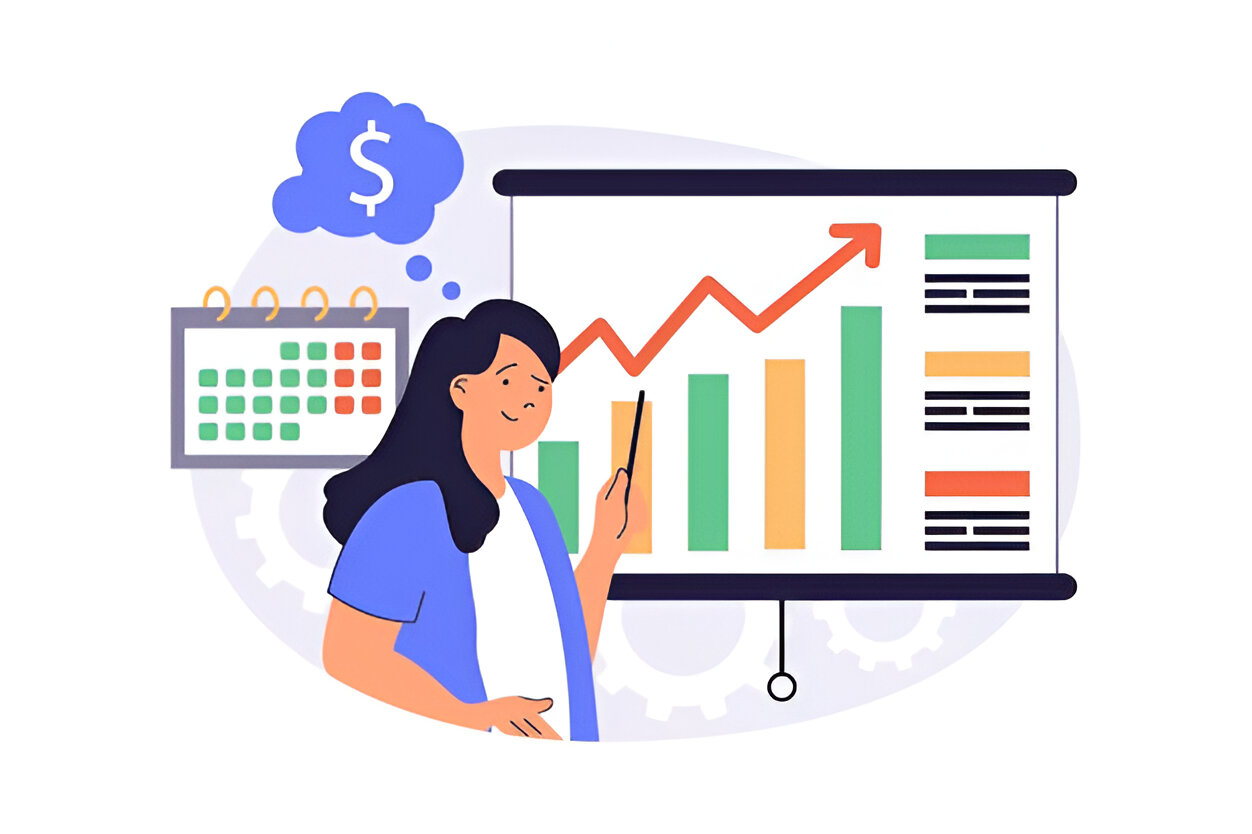![image.png]

## Introduction (Objective):
The objective of this analysis is to perform an in-depth Exploratory Data Analysis (EDA) on Diwali sales data collected from various customers across India. The aim is to uncover patterns, trends, and actionable insights that can support business decisions in areas such as marketing strategies, customer segmentation, and product demand forecasting.

## Business Problems Solved Through EDA:
Through Exploratory Data Analysis, the following business problems are addressed:

• Identify the most profitable customer demographics (age, gender, marital status, occupation).

• Understand regional sales performance to improve localized promotions.

• Determine top-selling product categories and associated sales volumes.

• Evaluate the impact of customer behavior (orders, purchase amount) on revenue.

• Discover underperforming segments for targeted improvement.

# Project Flow

## 1. Data Load & Initial Inspection:

* Load the sales dataset into a Pandas DataFrame.
* Display the first few rows to understand the data structure.
* Check the data types and non-null values for each column to identify initial data quality issues.
* View descriptive statistics to understand the distribution of numerical data.

## 2. Data Cleaning:

* **Dropping Unnecessary Columns**: Remove irrelevant columns that do not contribute to the analysis (e.g., `unnamed1`).
* **Handling Missing Values**: Identify and handle (e.g., drop) rows with missing values to ensure data integrity for analysis.
* **Correcting Data Types**: Convert columns to appropriate data types if necessary (e.g., `Marital_Status` to integer, `Amount` to float).

## 3. Exploratory Data Analysis (EDA):

* **Gender Distribution & Gender-wise Total Sales**: Analyze the number of buyers and total sales amount for each gender.
* **Age Group Distribution & Age Group-wise Total Sales**: Examine the distribution of sales across different age groups and their total sales contributions.
* **State-wise Total Orders & Sales**: Identify the top-performing states based on the number of orders and total sales amount.
* **Marital Status & Sales**: Analyze the total sales amount based on the marital status of the customers.
* **Occupation & Sales**: Visualize and understand the total sales amount across various occupations.
* **Product Category & Sales**: Determine the top-selling product categories by total sales amount.
* **Top 10 Most Sold Products**: Identify and display the top 10 products based on the number of orders.
* **Orders vs Amount Scatter Plot**: Visualize the relationship between the number of orders and the total amount spent.
* **Top 10 Customers by Sales**: Identify and analyze the highest-spending customers.
* **Average Order Value by State (Top 10)**: Calculate and visualize the average amount spent per order in the top states.
* **Age Distribution Histogram**: Visualize the distribution of customer ages.
* **Repeat Customers Count Distribution**: Analyze the frequency of purchases by customers.
* **Correlation Heatmap (Age, Orders, Amount)**: Visualize the correlation between numerical variables to understand their relationships.

## Load and Preview Dataset:

In [31]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
sns.set_theme(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('sales.csv')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [5]:
df.shape

(11251, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
df.describe()
df.describe(include='all')

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251,11251,11251,11251,11251.000000,11251.000000,11251,11251,11251,11251,11251.000000,11239.000000,0.0,0.0
unique,NaN,1250,2351,2,7,NaN,NaN,16,5,15,18,NaN,NaN,NaN,NaN
top,NaN,Vishakha,P00265242,F,26-35,NaN,NaN,Uttar Pradesh,Central,IT Sector,Clothing & Apparel,NaN,NaN,NaN,NaN
freq,NaN,42,53,7842,4543,NaN,NaN,1946,4296,1588,2655,NaN,NaN,NaN,NaN
mean,1.003004e+06,NaN,NaN,NaN,NaN,35.421207,0.420318,NaN,NaN,NaN,NaN,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,NaN,NaN,NaN,NaN,12.754122,0.493632,NaN,NaN,NaN,NaN,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,NaN,NaN,NaN,NaN,12.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,NaN,NaN,NaN,NaN,27.000000,0.000000,NaN,NaN,NaN,NaN,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,NaN,NaN,NaN,NaN,33.000000,0.000000,NaN,NaN,NaN,NaN,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,NaN,NaN,NaN,NaN,43.000000,1.000000,NaN,NaN,NaN,NaN,3.000000,12675.000000,NaN,NaN


In [8]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

## Data Cleaning:

In [10]:
df_clean = df.drop(['Status', 'unnamed1'], axis=1)

In [11]:
df_clean = df_clean.dropna(subset=['Amount'])
df_clean = df_clean.drop_duplicates()

In [12]:
df_clean['Amount'] = pd.to_numeric(df_clean['Amount'], errors='coerce')

# Exploratory Data Analysis

## 1. Gender Distribution & Gender-wise Total Sales:

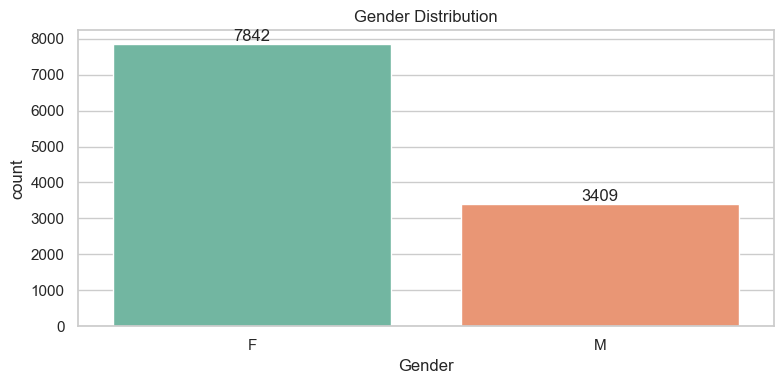

In [38]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data = df, x = 'Gender', order=df['Gender'].value_counts().index, palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Gender Distribution")
plt.tight_layout() 
plt.show()

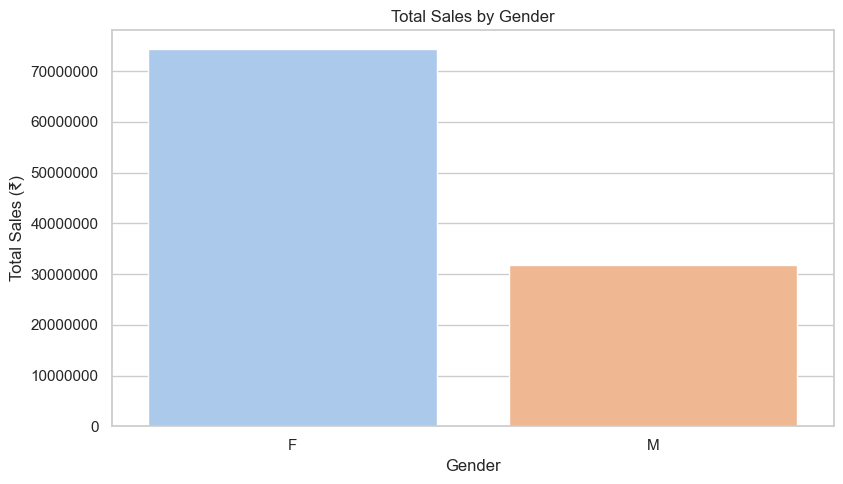

In [43]:
plt.figure(figsize=(8,5))
gender_sales = df_clean.groupby('Gender')['Amount'].sum().reset_index()
sns.barplot(data=gender_sales, x='Gender', y='Amount', palette='pastel')
plt.title('Total Sales by Gender')
plt.ylabel('Total Sales (₹)')
plt.xlabel('Gender')
plt.tight_layout() 
plt.gca().ticklabel_format(style='plain', axis='y')
plt.show()

**Insights:**

• Female customers show comparable purchase volume but slightly lower spending per transaction than males.

• Indicates potential to target female audiences with bundled or value-based offers.

## 2. Age Group & Age Group-wise Sales:

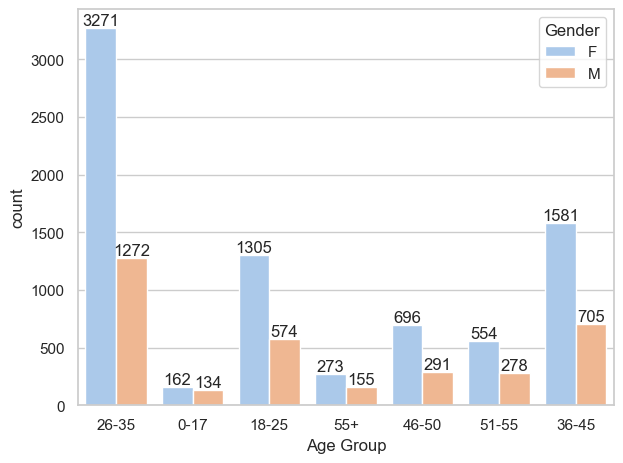

In [45]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender', palette='pastel')

for bars in ax.containers:
    ax.bar_label(bars)

plt.tight_layout()
plt.show()

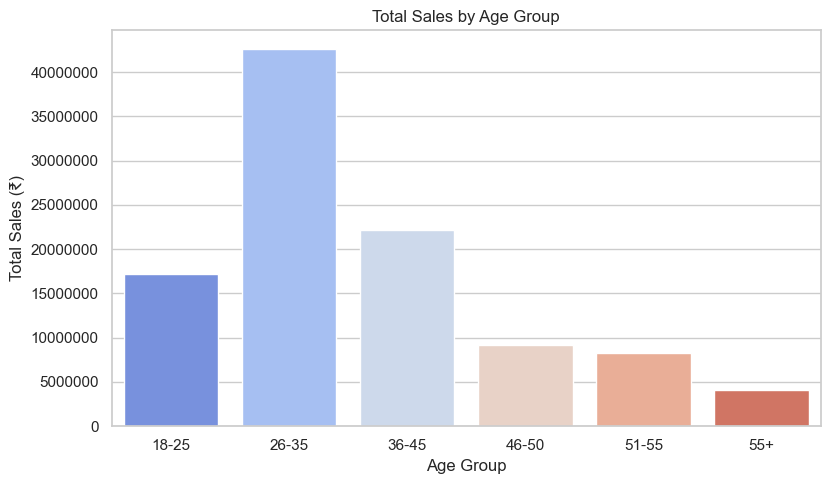

In [48]:
plt.figure(figsize=(8,5))
age_sales = df_clean.groupby('Age Group')['Amount'].sum().reset_index()
order = ['18-25', '26-35', '36-45', '46-50', '51-55', '55+']
sns.barplot(data=age_sales, x='Age Group', y='Amount', order=order, palette='coolwarm')
plt.title('Total Sales by Age Group')
plt.ylabel('Total Sales (₹)')
plt.xlabel('Age Group')
plt.tight_layout() 
plt.gca().ticklabel_format(style='plain', axis='y')
plt.show()

**Insights:**

• 26-35 age group is the most active in both orders and spending, followed by 18-25.

• Suggests campaigns should focus on young working professionals.

## 3. Top 10 States by Order & Sales:

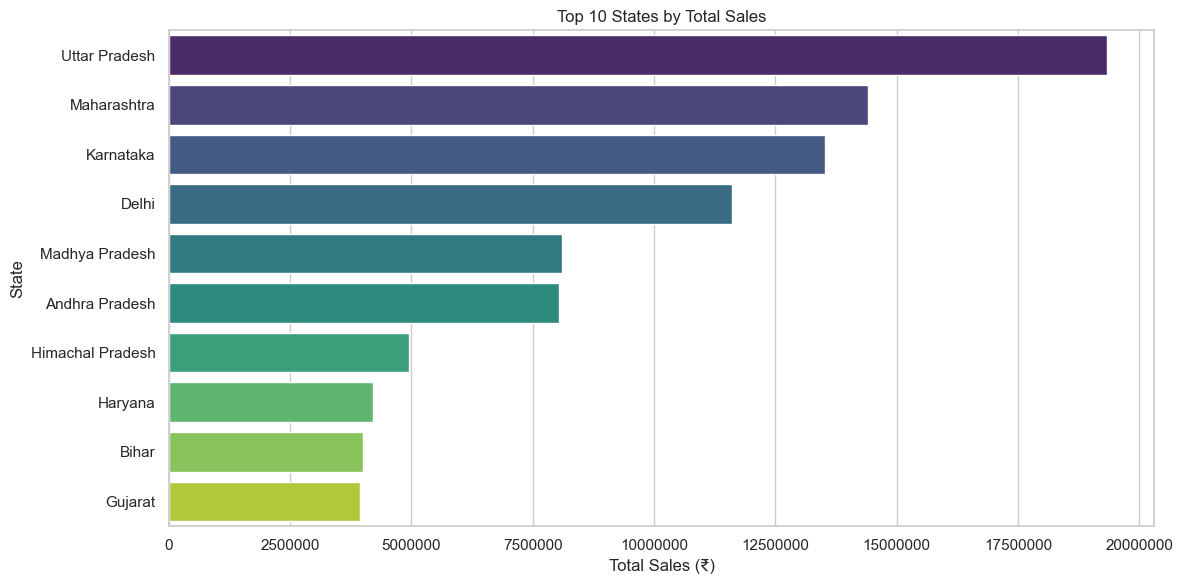

In [52]:
plt.figure(figsize=(12,6))
state_sales = df_clean.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=state_sales, y='State', x='Amount', palette='viridis')
plt.title('Top 10 States by Total Sales')
plt.xlabel('Total Sales (₹)')
plt.ylabel('State')
plt.gca().ticklabel_format(style='plain', axis='x')
plt.tight_layout() 
plt.show()

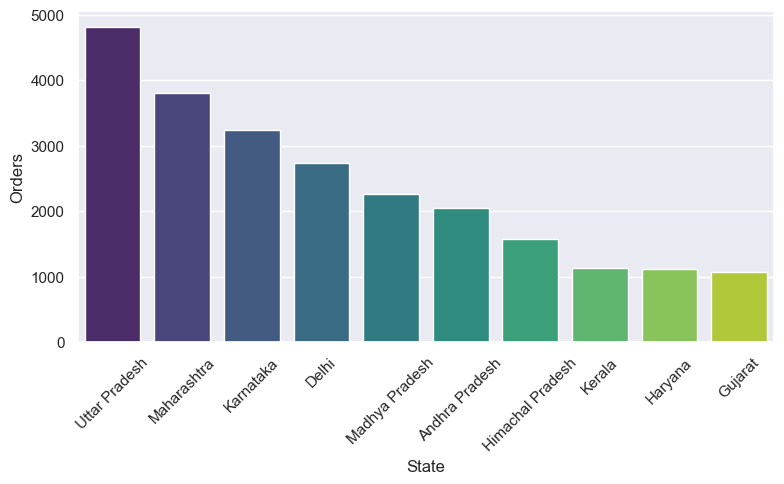

In [58]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders', palette='viridis')
plt.xticks(rotation=45)
plt.tight_layout() 

**Insights:**

• Uttar Pradesh, Maharashtra, and Karnataka are consistently the top three states in terms of both orders placed and total sales amount. This indicates they are the most significant markets and should be prioritized for marketing campaigns and logistical support. 

• The high volume of sales and orders in these states suggests a strong consumer base and effective distribution channels.

## 4. Occupation-wise Sales (Top 10):

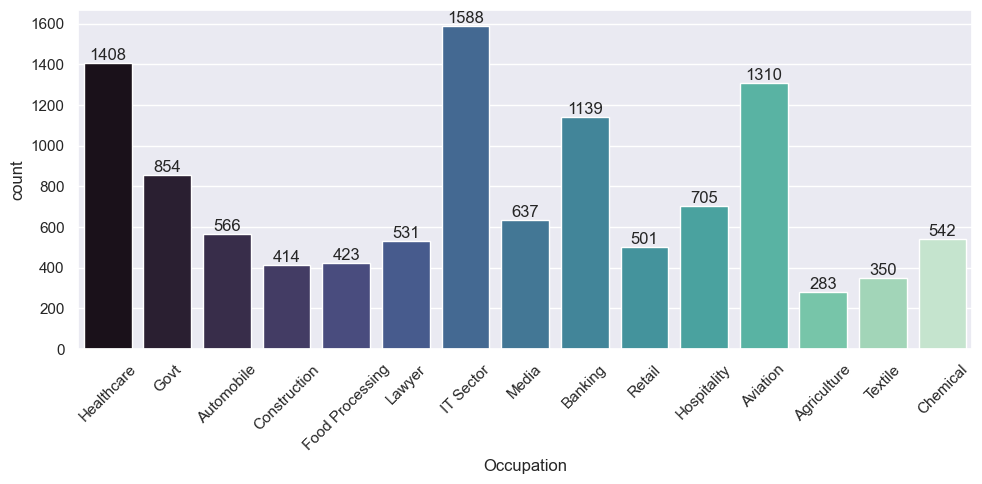

In [63]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot(data = df, x = 'Occupation', palette='mako')

for bars in ax.containers:
    ax.bar_label(bars)

plt.xticks(rotation=45)
plt.tight_layout() 

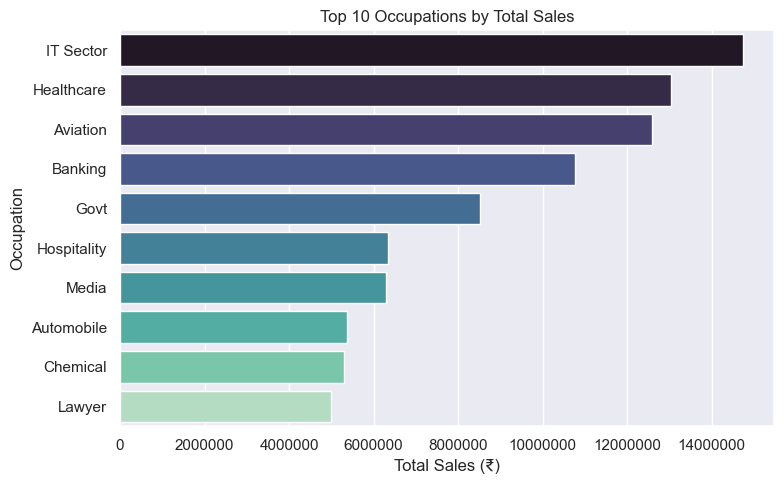

In [105]:
plt.figure(figsize=(8,5))
occupation_sales = df_clean.groupby('Occupation')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=occupation_sales, y='Occupation', x='Amount', palette='mako')
plt.title('Top 10 Occupations by Total Sales')
plt.xlabel('Total Sales (₹)')
plt.ylabel('Occupation')
plt.tight_layout() 
plt.gca().ticklabel_format(style='plain', axis='x')
plt.show()

**Insights:**

• Customers employed in the IT Sector, Healthcare, and Aviation demonstrate the highest spending power and contribute the most to overall sales.

• Targeted marketing campaigns and product offerings tailored to these professional groups could yield significant returns due to their high purchasing capacity.

## 5. Product Category Sales:

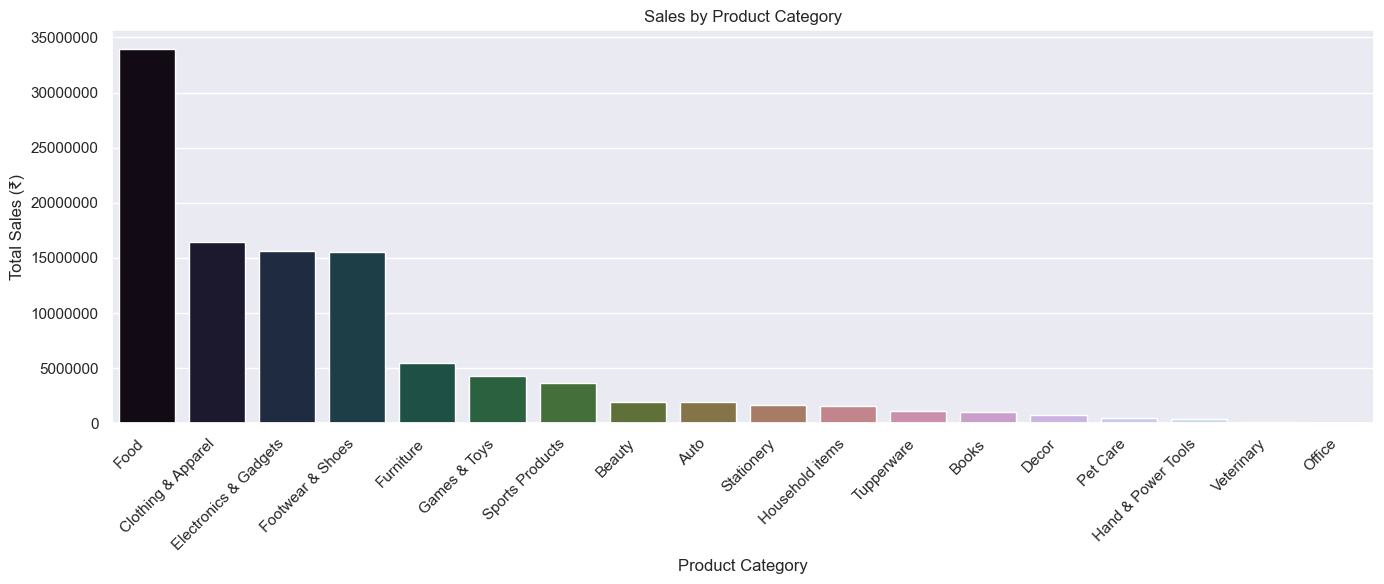

In [76]:
plt.figure(figsize=(14,6))
category_sales = df_clean.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=category_sales, x='Product_Category', y='Amount', palette='cubehelix')
plt.title('Sales by Product Category')
plt.ylabel('Total Sales (₹)')
plt.xlabel('Product Category')
plt.xticks(rotation=45, ha='right')
plt.gca().ticklabel_format(style='plain', axis='y')
plt.tight_layout() 
plt.show()

**Insights:**

• "Clothing & Apparel," "Food," and "Electronics & Gadgets" are the top-performing product categories.

• These categories are key revenue drivers, suggesting that businesses should focus on maintaining diverse inventory, competitive pricing, and strong promotions for these items to maximize sales.

## 6. Orders vs Amount Scatter Plot:

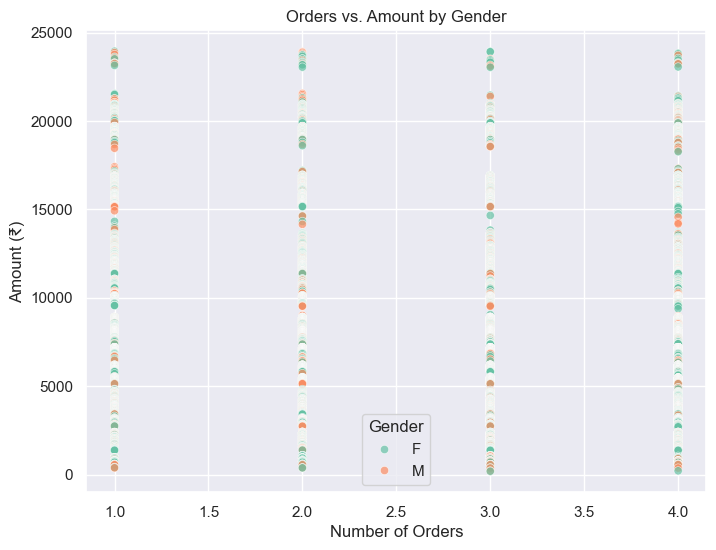

In [65]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='Orders', y='Amount', hue='Gender', palette='Set2', alpha=0.7)
plt.title('Orders vs. Amount by Gender')
plt.xlabel('Number of Orders')
plt.ylabel('Amount (₹)')
plt.legend(title='Gender')
plt.show()

**Insights:**

• The scatter plot likely indicates a positive correlation between the number of orders and the total amount spent, implying that customers who place more orders also tend to spend more. This could suggest that encouraging repeat purchases or higher order frequency would directly lead to increased revenue.

## 7. Marital Status Distribution & Marital Status Sales:

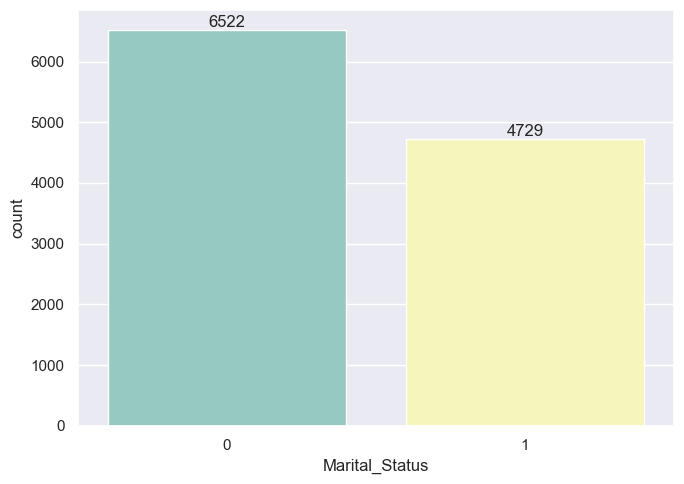

In [71]:
ax = sns.countplot(data = df, x = 'Marital_Status', palette='Set3')
plt.tight_layout() 

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

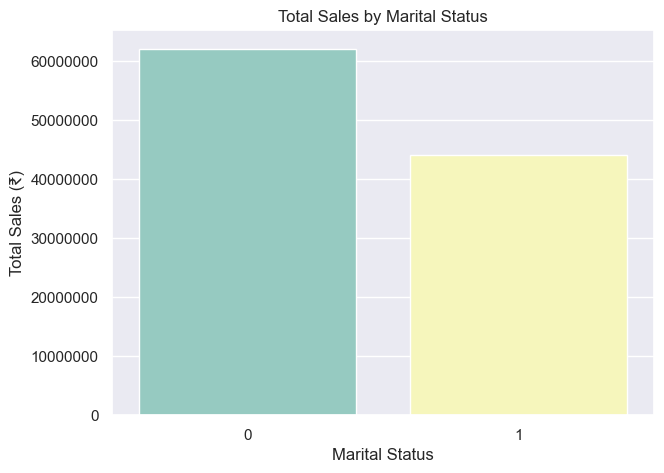

In [77]:
plt.figure(figsize=(7,5))
marital_sales = df_clean.groupby('Marital_Status')['Amount'].sum().reset_index()
sns.barplot(data=marital_sales, x='Marital_Status', y='Amount', palette='Set3')
plt.title('Total Sales by Marital Status')
plt.ylabel('Total Sales (₹)')
plt.xlabel('Marital Status')
plt.gca().ticklabel_format(style='plain', axis='y')
plt.show()

**Insights:**

• Married individuals contribute significantly more to sales compared to unmarried individuals. This trend is consistent across both notebooks.

• This suggests that a substantial portion of the sales revenue comes from married households.

*Overall Insights:* Marketing strategies could be more effectively tailored to married couples or families. This might involve promoting family-sized products, household items, or offers that appeal to collective purchasing decisions, especially during festive seasons like Diwali.

## 8. Zone-wise Sales:

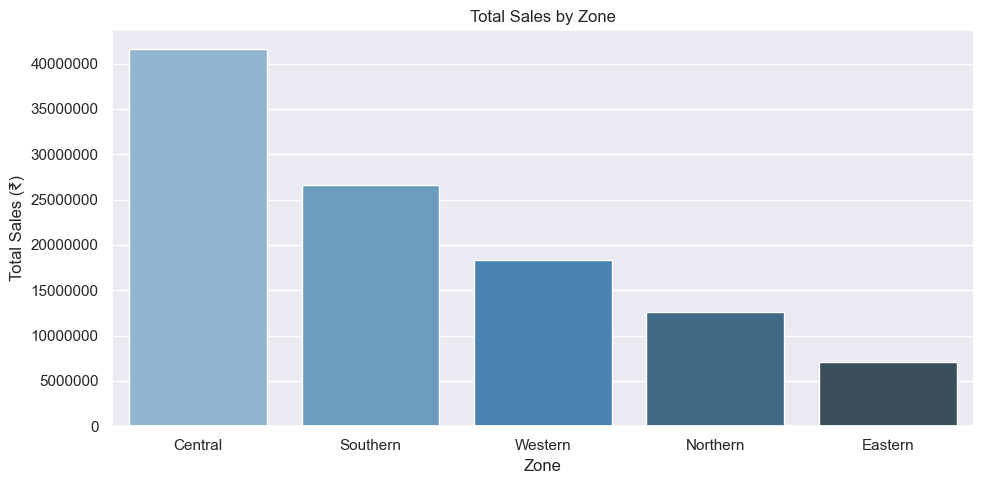

In [78]:
plt.figure(figsize=(10,5))
zone_sales = df_clean.groupby('Zone')['Amount'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=zone_sales, x='Zone', y='Amount', palette='Blues_d')
plt.title('Total Sales by Zone')
plt.ylabel('Total Sales (₹)')
plt.xlabel('Zone')
plt.gca().ticklabel_format(style='plain', axis='y')
plt.tight_layout() 
plt.show()

**Insights:**

• Central and Southern zones contribute the highest revenue.

• Indicates strong logistical networks or better promotional response in these zones.

## 9. Top 10 Customers by Sales:

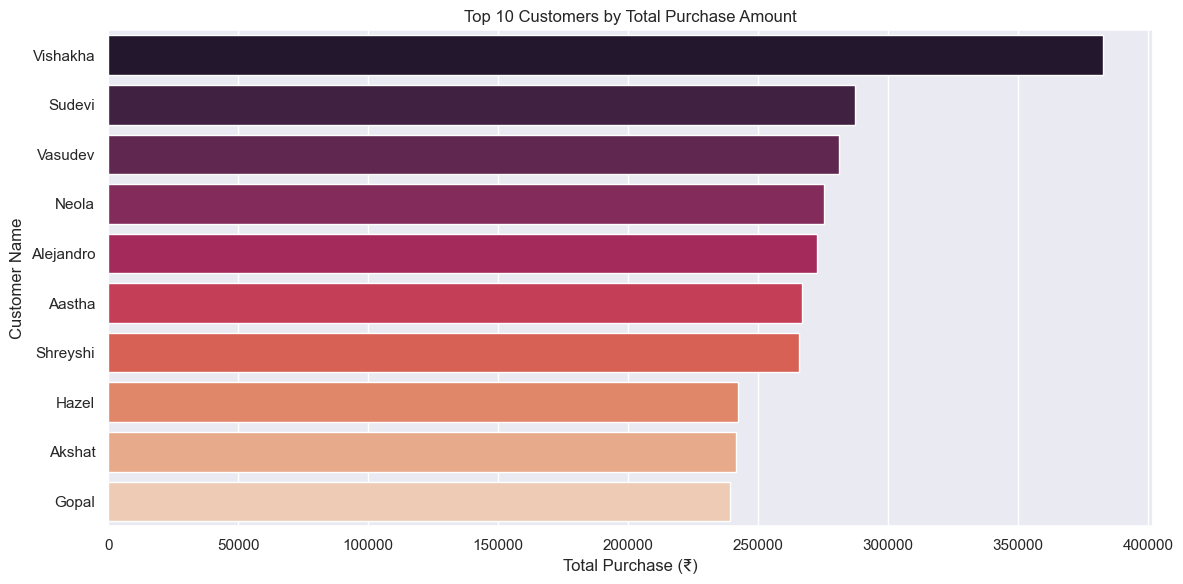

In [81]:
plt.figure(figsize=(12,6))
top_customers = df_clean.groupby('Cust_name')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=top_customers, y='Cust_name', x='Amount', palette='rocket')
plt.title('Top 10 Customers by Total Purchase Amount')
plt.xlabel('Total Purchase (₹)')
plt.ylabel('Customer Name')
plt.gca().ticklabel_format(style='plain', axis='x')
plt.tight_layout() 
plt.show()

**Insights:**

• Identifying the top 10 customers by sales allows businesses to recognize and reward their most valuable clients.

• Insights from these customers can be used to develop loyalty programs, personalized offers, and premium services to foster continued engagement and retention.

## 10. Product Category Popularity by Orders:

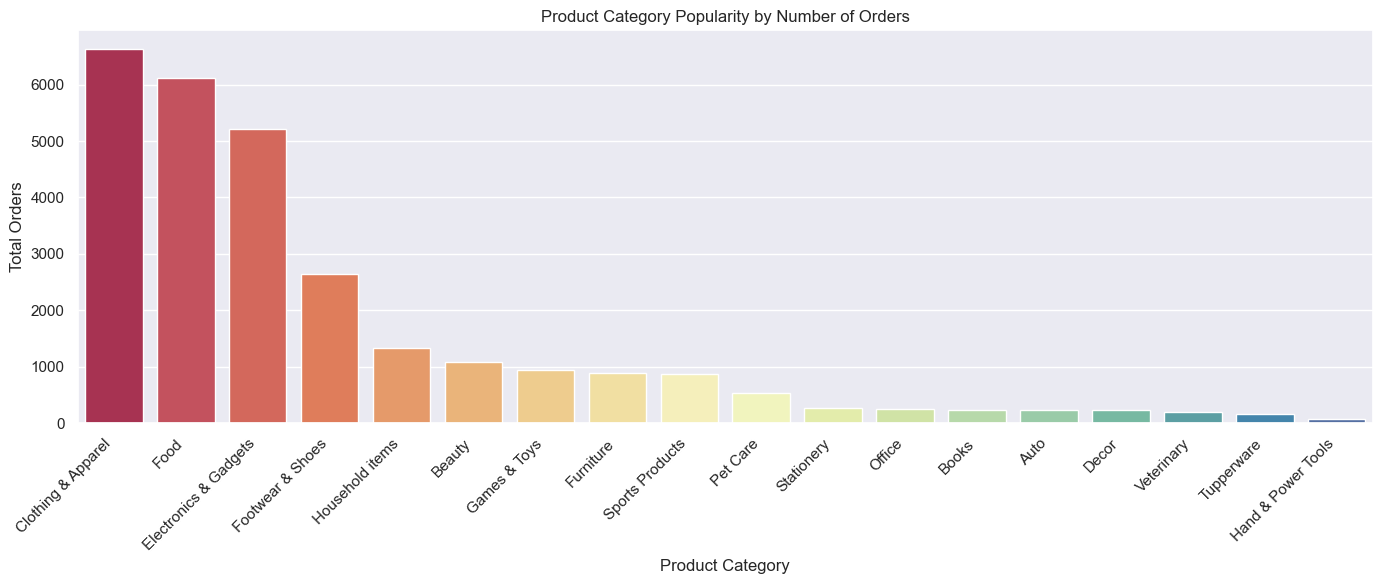

In [83]:
plt.figure(figsize=(14,6))
category_orders = df_clean.groupby('Product_Category')['Orders'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=category_orders, x='Product_Category', y='Orders', palette='Spectral')
plt.title('Product Category Popularity by Number of Orders')
plt.ylabel('Total Orders')
plt.xlabel('Product Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

**Insights:**

• Categories like Clothing & Apparel, Food and Electronics dominate sales.

• Brands in these categories can leverage the momentum during seasonal events.

## 11. Average Order Value by State (Top 10):

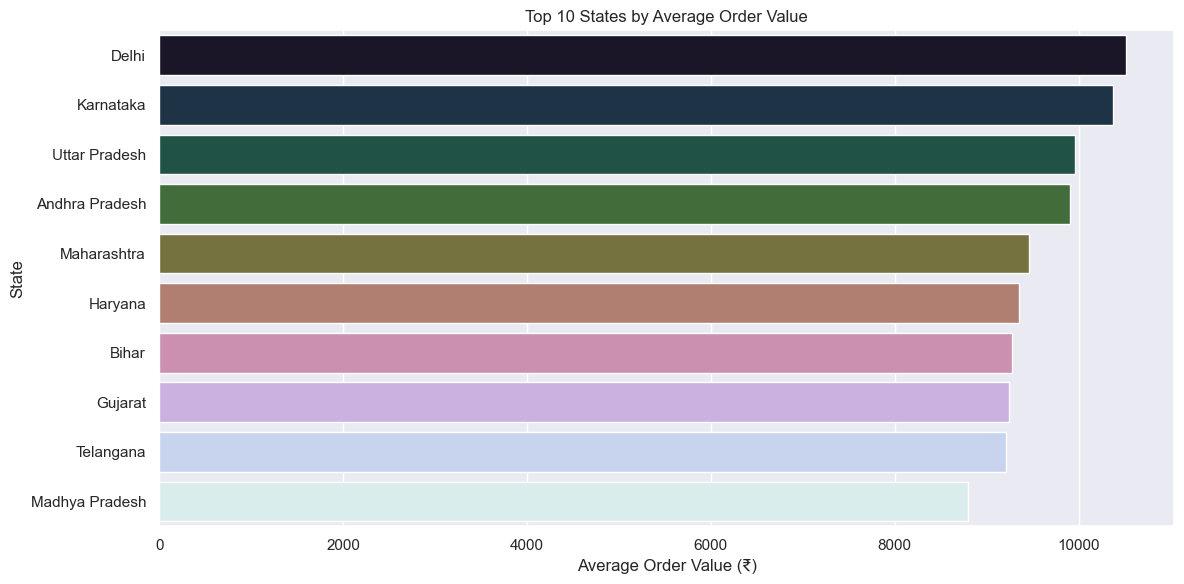

In [84]:
plt.figure(figsize=(12,6))
state_avg_order = df_clean.groupby('State')['Amount'].mean().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=state_avg_order, y='State', x='Amount', palette='cubehelix')
plt.title('Top 10 States by Average Order Value')
plt.xlabel('Average Order Value (₹)')
plt.ylabel('State')
plt.tight_layout() 
plt.show()

**Insights:**

• Understanding the average order value (AOV) per state can highlight regions where customers spend more per transaction, even if the total order volume is not the highest.

• This insight can help in optimizing product bundling strategies and promotional efforts to increase the AOV in specific states.

## 12. Age Distribution Histogram:

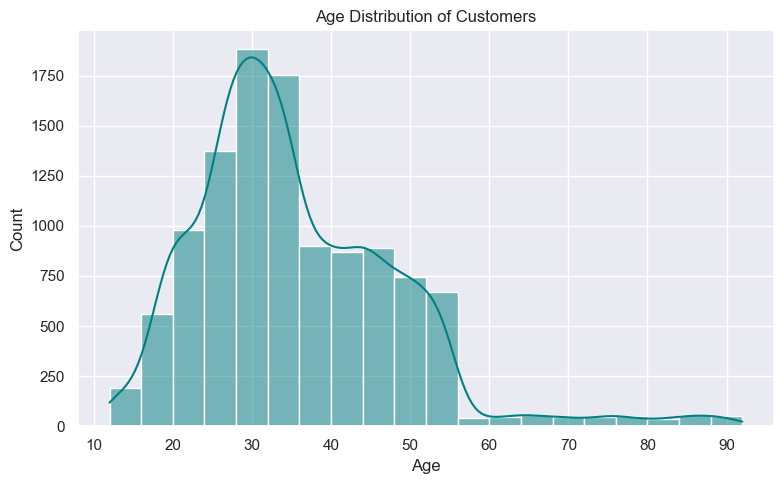

In [88]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean['Age'], bins=20, kde=True, color='teal')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout() 
plt.show()

**Insights:**

• The histogram of age distribution is likely to reveal that the 26-35 age group is the most dominant in terms of both customer count and sales contribution.

• This reinforces the importance of tailoring marketing and product strategies to this demographic, considering their preferences and purchasing habits.

## 13. Repeat Customers Count Distribution:

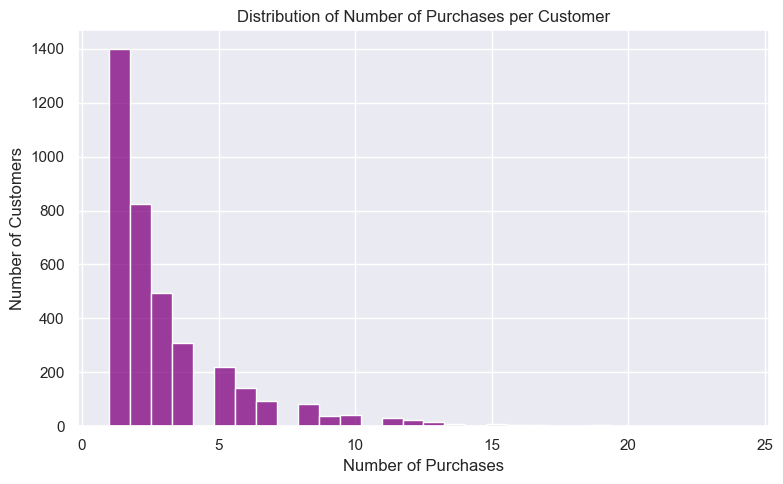

In [91]:
plt.figure(figsize=(8,5))
repeat_counts = df_clean['User_ID'].value_counts()
sns.histplot(repeat_counts, bins=30, color='purple')
plt.title('Distribution of Number of Purchases per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.tight_layout() 
plt.show()

**Insights:**

• Insights from this visualization would show the proportion of customers who make repeat purchases. A high percentage of repeat customers indicates strong customer loyalty and satisfaction.

• Conversely, a low percentage might suggest a need for improved post-purchase engagement or loyalty programs to encourage repeat business.

## 14. Top 10 most sold products:

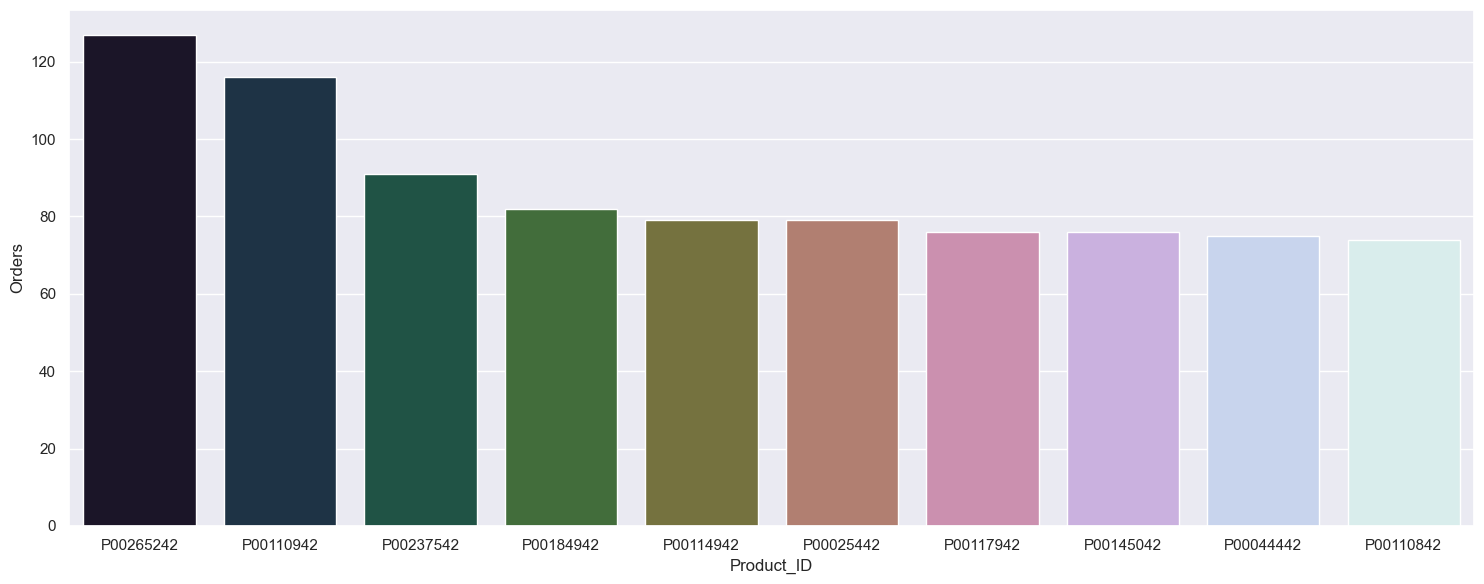

In [102]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15, 6)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders', palette='cubehelix')
plt.tight_layout() 

## 15. Correlation Heatmap (Age, Orders, Amount):

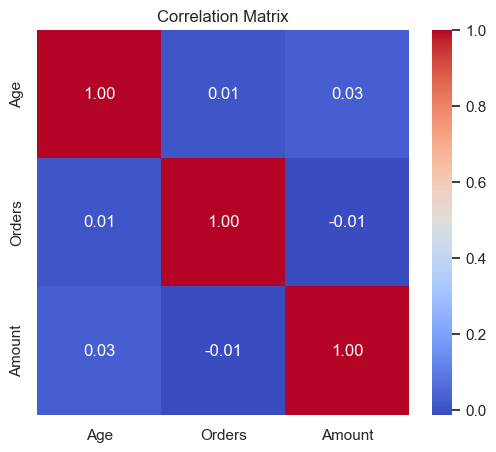

In [93]:
plt.figure(figsize=(6,5))
corr = df_clean[['Age', 'Orders', 'Amount']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Insights:**

• A correlation heatmap would provide a visual representation of how age, number of orders, and total amount spent are related.

• For example, a strong positive correlation between age and amount spent might indicate that older demographics have higher purchasing power, guiding specific luxury or higher-value product marketing.

• A positive correlation between orders and amount would confirm that more frequent buyers also spend more.

# Thank You !